In [ ]:
#A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person named on it to charge purchases and services to his linked account charges which will be debited regularly.  
#Nowadays, card data is read by ATMs, swiping machines, store readers, banks, and online transactions. 
#Each card has a unique card number which is very important, its security mainly relies on the physical security of the card and also the privacy of the credit card number. 
#There is a rapid growth in credit card transactions which has led to substantial growth in scam cases. 
#Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. 
#Multiple data mining and statistical techniques are used to catch fraud. 
#Therefore the detection of fraud using efficient and secured methods are very important.


In [6]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import itertools

In [7]:
# Load the csv file

dataframe = pd.read_csv(r"C:\Users\saura\Documents\INTELLIPAT\Projects\Credit card\creditcard1.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
dataframe.isnull().sum().sum() #No null values

0

In [9]:
dataframe["Amount"].describe()

count    40700.000000
mean        88.563152
std        237.173302
min          0.000000
25%          7.450000
50%         23.895000
75%         79.942500
max       7879.420000
Name: Amount, dtype: float64

In [14]:
#Count of genuine and fraud transactions

non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: ",round(fraud_percent*100,2),'%')

Number of Genuine transactions:  40594
Number of Fraud transactions:  106
Percentage of Fraud transactions:  26.04 %


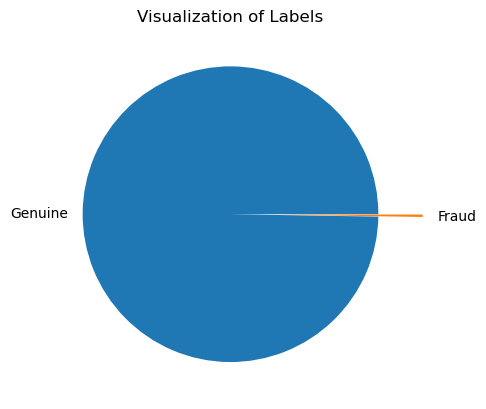

In [30]:
#Visualising data

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
plt.pie(x=count_classes, explode=[0,0.3],labels=labels)
plt.title("Visualization of Labels")
plt.show()

In [31]:
#Standardising data and removing irrelevent columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)


In [32]:
#splitting data into dependent and independent features

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [33]:
#Train-test split

from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)


Shape of train_X:  (28490, 29)
Shape of test_X:  (12210, 29)


In [34]:
#Model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
DT = DecisionTreeClassifier()
# Random Forest
RF = RandomForestClassifier(n_estimators= 100)

In [36]:
#Training and predictions

DT.fit(train_X, train_Y)
predictions_dt = DT.predict(test_X)
DT_score = DT.score(test_X, test_Y) * 100
RF.fit(train_X, train_Y)
predictions_rf = RF.predict(test_X)
RF_score = RF.score(test_X, test_Y) * 100
print("Random Forest Score: ", round(RF_score,2))
print("Decision Tree Score: ", round(DT_score,2))

Random Forest Score:  99.93
Decision Tree Score:  99.89


In [37]:
#Metrics

from sklearn.metrics import *
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [38]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[12171     4]
 [    9    26]]


In [40]:
print('Metrics of decision tree :')
metrics(test_Y, predictions_dt)

Metrics of decision tree :
Accuracy: 0.99894
Precision: 0.86667
Recall: 0.74286
F1-score: 0.80000


In [42]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest ")
print(confusion_matrix_rf)


Confusion Matrix - Random Forest 
[[12173     2]
 [    6    29]]


In [41]:
print('Metrics of random forest :')
metrics(test_Y, predictions_rf)

Metrics of random forest :
Accuracy: 0.99934
Precision: 0.93548
Recall: 0.82857
F1-score: 0.87879


Random forest gives highest accuracy of 99.93%.